In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

d:\New folder\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\New folder\anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\New folder\anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('C:/Users/lalit/Downloads/Algerianfire/Algerianfire.csv', header =1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [7]:
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1

In [8]:
df[['Region']] = df[['Region']].astype(int)

In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [10]:
col_to_conv = ['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for col in col_to_conv:
    df[col] = pd.to_numeric(df[col],errors='coerce')

    if df[col].dropna().apply(lambda x: x.is_integer()).all():
        df[col] = df[col].astype('Int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    Int64  
 1   month        243 non-null    Int64  
 2   year         243 non-null    Int64  
 3   Temperature  243 non-null    Int64  
 4    RH          243 non-null    Int64  
 5    Ws          243 non-null    Int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int32  
dtypes: Int64(6), float64(7), int32(1), object(1)
memory usage: 39.1+ KB


In [12]:
df['Region'] = df['Region'].astype('Int64')

In [13]:
df.columns = df.columns.str.strip()

In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [15]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [16]:
df['Classes'] = df['Classes'].str.strip().str.lower()
df['Classes'] = df['Classes'].map({'fire': 1, 'not fire': 0})


In [17]:
df['Classes'].value_counts(normalize= True)

1.0    0.563786
0.0    0.436214
Name: Classes, dtype: float64

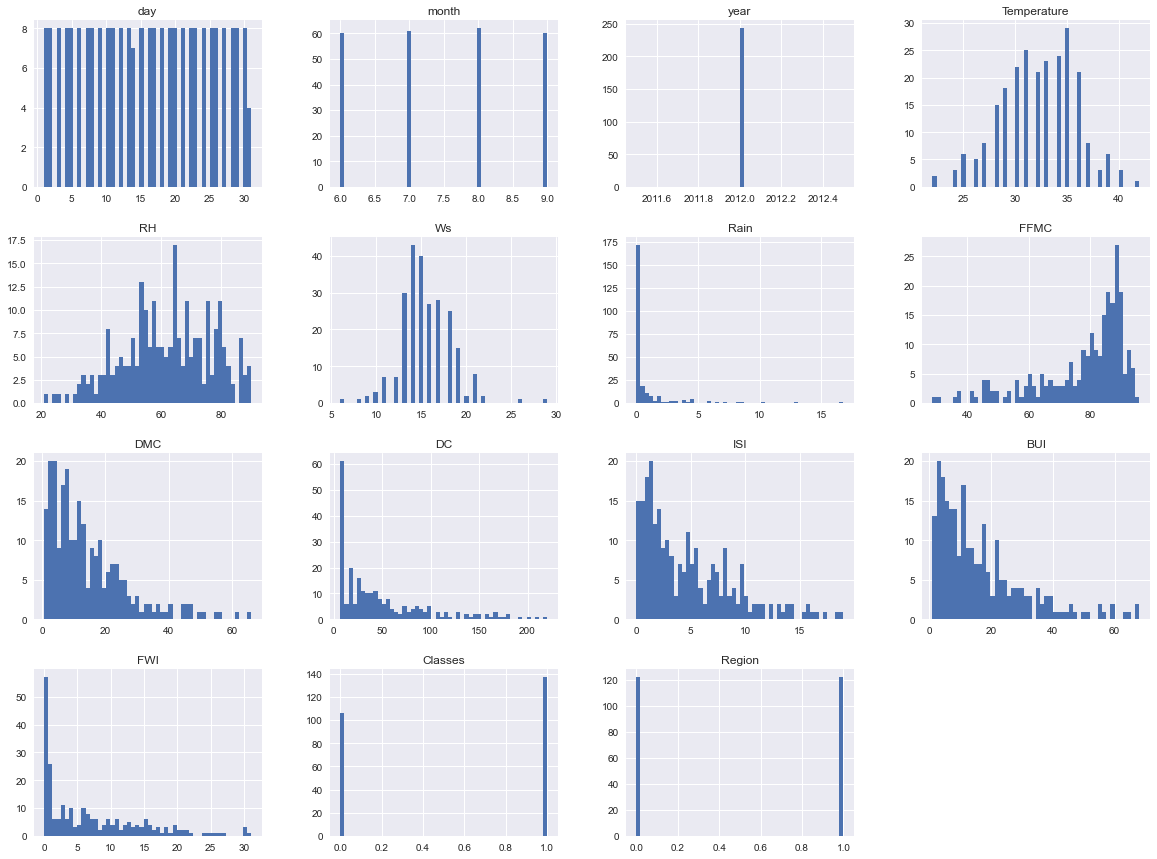

In [18]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [42]:
df.to_csv('C:/Users/lalit/Downloads/Algerianfire/AlgerianfireCleaned.csv',index =False)

## EDA

In [19]:
df_copy = df.copy()

In [20]:
df.drop(['year','month','day'],axis =1, inplace=True)

In [21]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<AxesSubplot:>

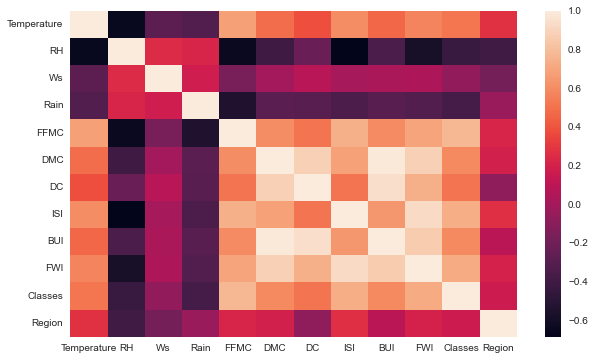

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())


<AxesSubplot:>

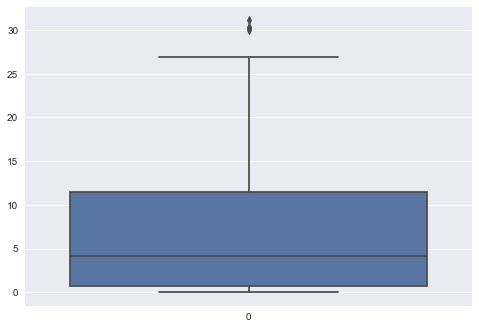

In [23]:
#Boxplots
sns.boxplot(data = df['FWI'])

In [28]:
df_copy = df_copy.dropna().reset_index(drop=True)

In [29]:
df_copy.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

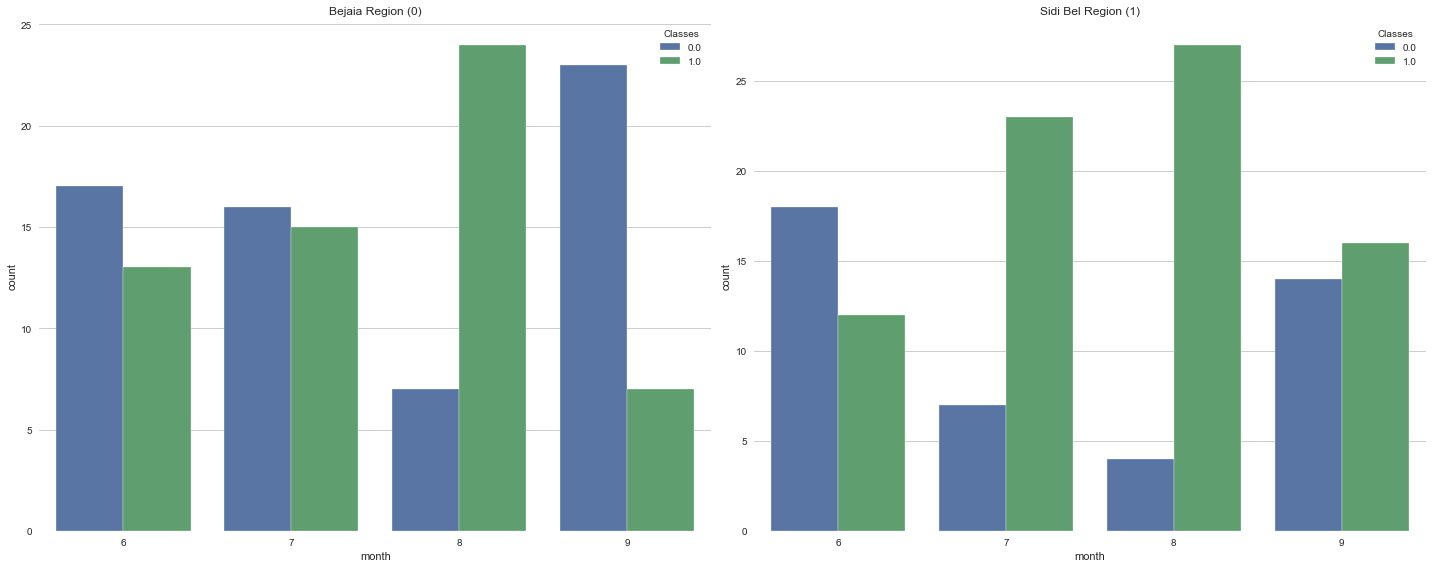

In [40]:
# Select the Region 
# Bejaia Region = 0 , Sidibel Region = 1

plt.figure(figsize=(20,8))

# Bejaia (Region 0)
plt.subplot(1,2,1)  # (rows, columns, position)
sns.countplot(x='month', hue='Classes', data=df_copy[df_copy['Region'] == 0])
plt.title("Bejaia Region (0)")


# Sidi Bel (Region 1)
plt.subplot(1,2,2)
sns.countplot(x='month', hue='Classes', data=df_copy[df_copy['Region'] == 1])
plt.title("Sidi Bel Region (1)")


plt.tight_layout()
plt.show()


## Insights of Analysis

For Sidi Bel Region there is increase in the fire, for the month of July and August:
 * But for the September month Fire rate is Greater than compared to Bejaia Region.
 * Except for June Chances of Fire are high for the Rest of the Months

For Bejaia Region  there is increase in fire in the month of August:
 * Decrease in Fire as compared to Sidi Bel Region and a sharp Decrease in September.
 * There is Less chances of fire in Starting till August 